In [245]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import sklearn
import math
from sklearn.linear_model import LinearRegression

mat = scipy.io.loadmat(r"C:\Users\JOEL-MORLEY\Data\Cleave Angles\925.mat") #Load the data
sorted(mat.keys()) #identify columns of data in the .mat file
data = mat['Surface'] #extract the values for the surface height
surface = np.empty([501,501])
surface[:,:] = data
x = np.arange(0,501,1)
#plt.plot(x, surface[250,:],x, surface[:,250]); #Check data has imported correctly

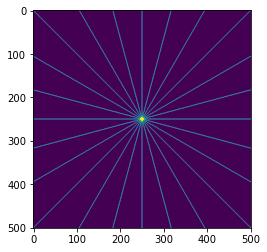

In [246]:
Y_raw = np.zeros((501,n))
Y_raw_rot = np.zeros((501,n))
surftest = np.zeros((501,501))
theta = range(-45,45,90//6)
for k in range (0,6):
    for i in range (0,501):
        j = 250+((250-i)*math.tan(theta[k]*(math.pi/180)))
        surftest[i,round(j)]=1
        surftest[round(j),(500-i)]=1
plt.imshow(surftest)

In [319]:
x_calc = np.zeros((500,n))
for k in range(0,n):
    x_calc[:,k] = np.arange(0,(500*0.000329)*math.cos(theta[k]*(math.pi/180)),(500*0.000329)*math.cos(theta[k]*(math.pi/180))/500)

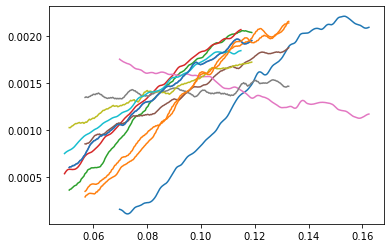

In [350]:
n=6
L=500
c=150
j_list = np.zeros((L,n))
x_calc = np.zeros((L,n))
x_clip = np.zeros((L-(2*c),n))
Y_clip = np.zeros((L-(2*c),n))
Y_clip_rot = np.zeros((L-(2*c),n))
Y_raw = np.zeros((L,n))
#Y_raw_t = np.zeros((L,n))
Y_raw_rot = np.zeros((L,n))
surftest = np.zeros((L,L))
theta = range(-45,45,90//(n))
surface_rot = np.rot90(np.array(surface))
for k in range(0,n):
    for i in range(0,L):
        j = 250+((250-i)*math.tan(theta[k]*(math.pi/180)))
        Y_raw[i,k] = surface[i,round(j)]
        Y_raw_t[i,k] = surface[round(j),(L-i)]
        Y_raw_rot[:,k] = np.flip(Y_raw_t[:,k])
        Y_clip[:,k] = Y_raw[c:L-c,k]
        Y_clip_rot[:,k] = Y_raw_rot[c:L-c,k]
    x_calc[:,k] = np.arange(0,(L*0.000329)/math.cos(theta[k]*(math.pi/180)),(L*0.000329)/math.cos(theta[k]*(math.pi/180))/L)
    x_clip[:,k] = x_calc[c:L-c,k]
plt.plot(x_clip[:,0], Y_clip[:,0],x_clip[:,1], Y_clip[:,1],x_clip[:,2], Y_clip[:,2],x_clip[:,3], Y_clip[:,3],x_clip[:,4], Y_clip[:,4],x_clip[:,5], Y_clip[:,5])
plt.plot(x_clip[:,0], Y_clip_rot[:,0],x_clip[:,1], Y_clip_rot[:,1],x_clip[:,2], Y_clip_rot[:,2],x_clip[:,3], Y_clip_rot[:,3],x_clip[:,4], Y_clip[:,4],x_clip[:,5], Y_clip_rot[:,5])

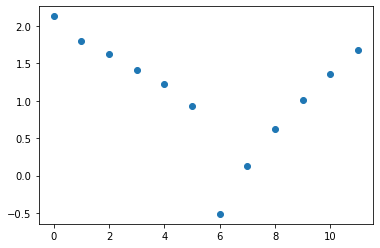

In [348]:
grad = []
n=6
for angle in range(0,n):
    Y = Y_clip[~np.isnan(Y_clip[:,angle]),angle]
    Y_fdata = Y.reshape(-1,1)
    x_crop = np.arange(0,len(Y),1)
    x_fdata = x_crop.reshape(-1,1)
    regress = LinearRegression().fit(x_fdata*0.000329,Y_fdata)
    grad.append((180/math.pi)*(math.atan(regress.coef_[0][0])))
for angle in range(0,n):
    Y = Y_clip_rot[~np.isnan(Y_clip_rot[:,angle]),angle]
    Y_fdata = Y.reshape(-1,1)
    x_crop = np.arange(0,len(Y),1)
    x_fdata = x_crop.reshape(-1,1)
    regress = LinearRegression().fit(x_fdata*0.000329,Y_fdata)
    grad.append((180/math.pi)*(math.atan(regress.coef_[0][0])))
plt.plot(grad, 'o')
#plt.plot(x_fdata, ((x_fdata-0)*regress.coef_[0][0])*0.000329-0.00010, x_fdata, Y_fdata);

In [188]:
n=6
theta = range(-45,45,90//(n))
for theta in range(-45,45,90//(n)):
    print(theta)

-45
-30
-15
0
15
30
